# Analysis

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [3]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# import coffee data
coffee = pd.read_csv("../data/crop/coffee_output.csv")

# import weather data
weather = pd.read_csv("../data/weather/weather_data.csv")

In [11]:
# TODO: Merge these two dataframes together

#df = pd.merge( weather, coffee, on="**")
cw_df =pd.merge(coffee, weather)

In [12]:
# TODO: View the first 5 rows of your data

cw_df.head()

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
0,Brazil,Minas Gerais,Arabica,16.30,2006,581.0,5330.0,175.0,2298.0,2319.0,3320.0,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207
1,Brazil,Minas Gerais,Arabica,23.70,2007,563.0,5730.0,186.0,2245.0,2552.0,3030.0,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605
2,Brazil,Minas Gerais,Arabica,16.85,2008,679.0,5720.0,196.0,2235.0,2559.0,3468.0,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408
3,Brazil,Minas Gerais,Arabica,25.55,2009,663.0,5770.0,188.0,2223.0,2596.0,3527.0,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746
4,Brazil,Minas Gerais,Arabica,22.10,2010,873.0,5725.0,244.0,2151.0,2662.0,3578.0,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907


In [13]:
# TODO: Check for null values 

cw_df.isnull().sum()

country                         0
subdivision                     0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                1
bearing_trees                   1
nonbear_hectares                1
bearing_hectares                1
bearing_trees_per_hectare       1
nonbearing_trees_per_hectare    1
rain_max                        0
temp_avg                        0
temp_max                        0
temp_min                        0
hum_max                         0
hum_min                         0
wind_max                        0
wind_avg                        0
dtype: int64

In [14]:
# TODO: Drop rows that contain null values

cw_clean= cw_df.dropna()

In [16]:
cw_clean.isnull().sum()

country                         0
subdivision                     0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                0
bearing_trees                   0
nonbear_hectares                0
bearing_hectares                0
bearing_trees_per_hectare       0
nonbearing_trees_per_hectare    0
rain_max                        0
temp_avg                        0
temp_max                        0
temp_min                        0
hum_max                         0
hum_min                         0
wind_max                        0
wind_avg                        0
dtype: int64

In [ ]:
# TODO: BEGIN YOUR EDA!



## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

What is the relationship between temp_avg and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer here:

This was abit alarming at first glance since it was tough making sense out of. I was under the impression that weather conditions would play a signifcant role.

In [34]:
x = cw_clean['temp_avg']
y = cw_clean['60kgs_bag']
correlation_matrix = np.corrcoef(x, y)[ 0,1]
print(correlation_matrix)

-0.12477217306378187


What is the relationship between minimum humidity and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer here:

this is rounding out to about 50%, and for that reason I would say there is a correlationn there, how strong is still left up to be determined. 

In [35]:
x = cw_clean['hum_min']
y = cw_clean['60kgs_bag']
correlation_matrix = np.corrcoef(x, y)[ 0,1]
print(correlation_matrix)

-0.5401709088326815


What is the relationship between rain_max and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer here:

Theres not enough evidence pointing that this is a strong correlation. But also necessary to note that maximum probably means excess, annd in this case an excess of rainfall coudl potentially wash out some of the yielded fruit.

In [36]:
x = cw_clean['rain_max']
y = cw_clean['60kgs_bag']
correlation_matrix = np.corrcoef(x, y)[ 0,1]
print(correlation_matrix)

-0.3958109913734919


What is the relationship between average wind speed and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer here:

There seems to be a strong correlation between average wind speed and 60kgs_bag, which would make sense since humid envoirnments tend to cause fungus, which depletes harvest.

In [37]:
x = cw_clean['wind_avg']
y = cw_clean['60kgs_bag']
correlation_matrix = np.corrcoef(x, y)[ 0,1]
print(correlation_matrix)

-0.7073271023009807


Perform the same bivariate analysis between the mentioned weather columns (temp_avg, hum_min, rain_max, and wind_avg) and a coffee-related column of your choice (bearing_trees, nonbearing_trees, bearing_trees_per_hectare, etc). Which directions do these relationships follow? What are the strengths of these relationships?

Answer here

In [40]:
pd.pivot_table(cw_clean, values='hum_min', index='bearing_trees', columns='year')

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2019,2020,2021,2022,2023
bearing_trees,,,,,,,,,,,,,,,,,
5330.0,57.806452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.47541,NaN,NaN,NaN,NaN,NaN
5700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.005464,NaN,NaN,NaN
5720.0,NaN,NaN,51.415301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5725.0,NaN,NaN,NaN,NaN,44.648352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5730.0,NaN,48.49375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5735.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.587209,NaN,NaN,NaN,NaN,NaN,NaN
5740.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.230769,NaN,NaN,NaN,NaN
5760.0,NaN,NaN,NaN,NaN,NaN,NaN,46.36612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Which weather factor seems to influence coffee production the most? 

Answer here:

Despite this not coming out the way i'd like, I would say not enough rainnfall seems to lead to a humid enviornment where fungus is likely to grow, so I would conclude weather conditions play the biggest factor, in particular droughts and humidity

<Axes: >

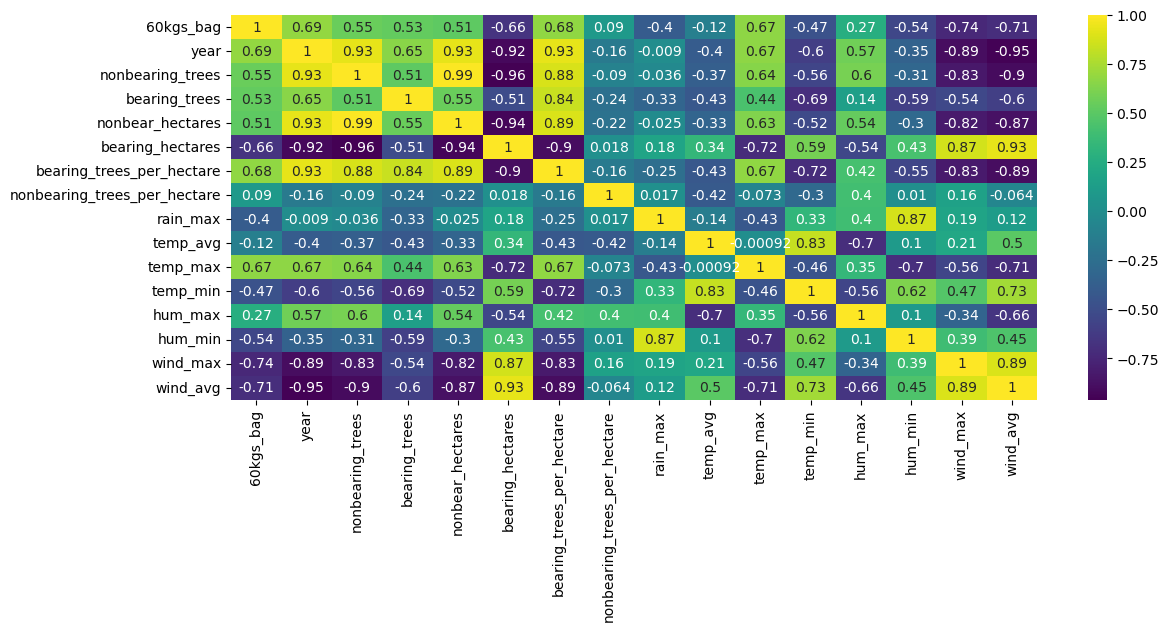

In [39]:
plt.figure(figsize=(13, 5))
num_weather = cw_clean.select_dtypes(include='number') 
corr = num_weather.corr()
sns.heatmap(corr, annot=True, cmap='viridis')

Which data would you collect to continue exploring the impacts of weather and economic forces on coffee production?

Answer here: 

While we look into coffee production a bit deeper, we've noticed some additional constraints in relation to weather condition. A area thats too humid is likely to cause more plants to wither due to fungus, but an excess of rain can also delay harvest. Therefore, it may be wise here to make a distniction between sunlight and humidity, as the former could bring necessary balance in weather condition. 

If you were preparing a report to provide coffee farmers, which weather condititions would you state are the most favorable for coffee growing (assuming any exist)?

Answer here:

Based on our anaylsis, we would suggest avoidinng humid enviornments since they often lead to an inncrease of fungus causing vital plants to wither. As an alternative solution, we reccommend a balanced warm-cool temp enviornment, where there's enough access to rain, as well as sunlight to reap full benefits.